# House Prices: Advanced Regression Techniques (0929)
https://www.kaggle.com/c/house-prices-advanced-regression-techniques  
https://medium.com/mighty-data-science-bootcamp/eda-데이터-설명서에서-시작하기-230060b9fc17

1. 데이터를 읽고, 기술통계 등 EDA 과정 수행
2. 결측치 처리(결측치가 많은 열은 제거, 적은 열은 대체값으로 대체)
3. saleprice를 log1p함수 적용 및 시각화 (선 그래프, log1p)
- x축: saleprice, y축: frequency
    - saleprice가 정규분포를 따르지 않는다면, 종속변수(y, 에상가격)는 정규분포를 따르도록 해야만 예측 결과에 대한 성능이 오르게 된다.
        - 왼쪽이나 오른쪽으로 치우쳐저 있는 그래프는 성능이 줄어든다 그래서 정규분포를 따르도록 해야한다 (hint:log1p함수)
4. 상관계수

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [58]:
train.head()
#test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [60]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [61]:
train.isnull().sum()[train.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [62]:
train=train.drop(['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)
test=test.drop(['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)

In [63]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [64]:
corr=train.corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5]),
 <a list of 38 Text major ticklabel objects>)

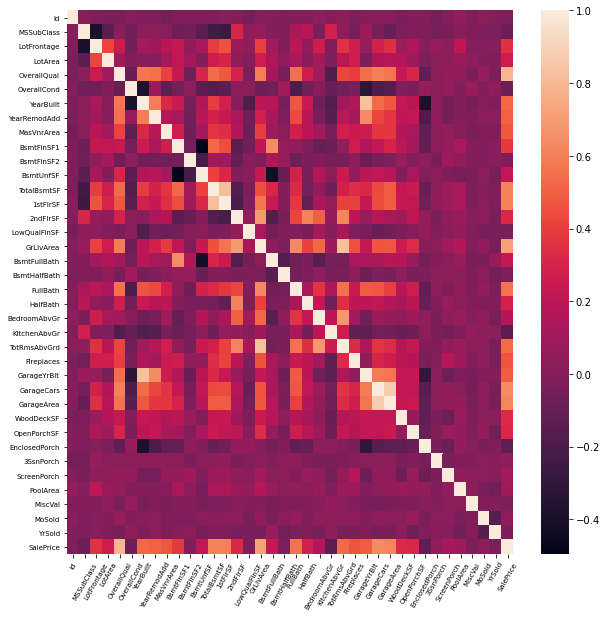

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.xticks(rotation=60, size=7) #글자 회전 및 사이즈 설정
plt.yticks(rotation=0, size=7) #
#퀴즈
#각 컬럼과 salesprice 컬럼간의 상관계수가 0.5보다 큰 데이터에 대해 히트맵으로 출력하시오

In [66]:
corr.SalePrice #종속변수와의 상관계수 / 종속변수: yTest에 해당하는 변수
'''
1또는 -1 직선에 어느정도 가까운지의 정도 (상관계수)

상관계수의 절대값의 크기는 직선관계에 가까운 정도
부호는 직선관계의 방향
corr > 0 => 점들이 우상향 방향으로 띠를 형성, 직선 기울기 양수
corr < 0 => 점들이 우하향방향으로 띠를 형성, 직선 기울기 음수
'''

'\n1또는 -1 직선에 어느정도 가까운지의 정도 (상관계수)\n\n상관계수의 절대값의 크기는 직선관계에 가까운 정도\n부호는 직선관계의 방향\ncorr > 0 => 점들이 우상향 방향으로 띠를 형성, 직선 기울기 양수\ncorr < 0 => 점들이 우하향방향으로 띠를 형성, 직선 기울기 음수\n'

In [67]:
#퀴즈
# SalePrice 값을 기준으로 내림차순 정렬하고, 가장 큰값에 해당하는 10개의 feature 명을 출력
corr.SalePrice[np.argsort(-corr.SalePrice)][1:11]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

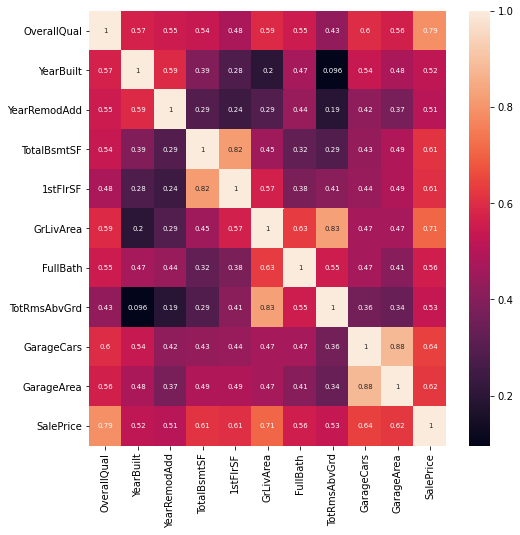

In [68]:
rev=corr.SalePrice[corr.SalePrice>0.5]
rev
rev_cols=list(rev.index.values)
rev_cols

corr2=train[rev_cols].corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr2, annot=True, annot_kws={'size':7})

In [121]:
corr=train.corr()
corrsales=corr[np.abs(corr['SalePrice'])>0.5].index
train=pd.DataFrame(train, columns=corrsales)
corr=train.corr()
corr

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,0.371600,0.507101
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,0.486665,0.613581
1stFlrSF,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,0.489782,0.605852
GrLivArea,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,0.468997,0.708624
FullBath,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,0.405656,0.560664
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,0.337822,0.533723
GarageCars,0.600671,0.537850,0.420622,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,0.882475,0.640409
GarageArea,0.562022,0.478954,0.371600,0.486665,0.489782,0.468997,0.405656,0.337822,0.882475,1.000000,0.623431


In [122]:
rel_vars=corr.SalePrice[corr.SalePrice>0.5]
rel_vars.index
rel_vars.index.values
rel_cols=list(rel_vars.index.values)
rel_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

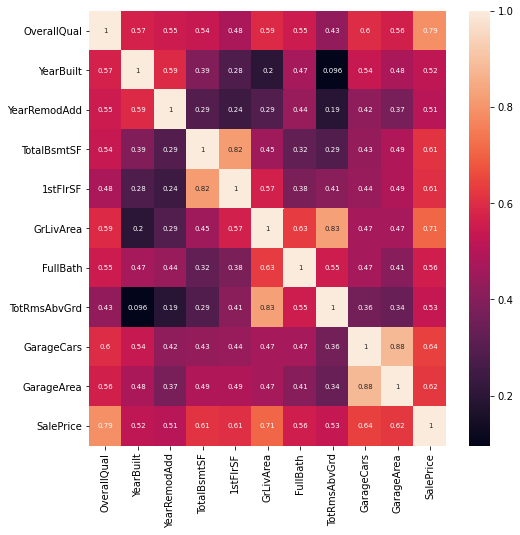

In [123]:
corr2=train[rel_cols].corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr2, annot=True, annot_kws={'size':7})

In [124]:
x=train[rel_cols[:-1]].values

In [125]:
y=train.iloc[:,-1].values

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.2, random_state=0)

In [128]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1168, 10), (292, 10), (1168,), (292,))

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
model=RandomForestRegressor(n_estimators=300, random_state=0)
model.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=300, random_state=0)

In [131]:
model.score(xtrain, ytrain)

0.9769987133158753

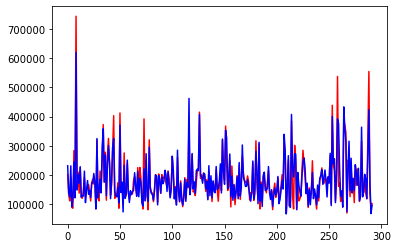

In [132]:
ypred=model.predict(xtest)
plt.plot(ytest, color='red')
plt.plot(ypred, color='blue')

In [37]:
ypred=pd.Series(list(ypred))

### x test

In [115]:
test[rel_cols[:-1]]
test[rel_cols[:-1]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   TotalBsmtSF   1459 non-null   float64
 4   1stFlrSF      1459 non-null   int64  
 5   GrLivArea     1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotRmsAbvGrd  1459 non-null   int64  
 8   GarageCars    1459 non-null   float64
 9   GarageArea    1459 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 114.1 KB


In [106]:
test.GarageArea[test.GarageArea.isna()]=test['GarageArea'][test['GarageType']=='Detchd'].mean()


<ipython-input-106-430137232d5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.GarageArea[test.GarageArea.isna()]=test['GarageArea'][test['GarageType']=='Detchd'].mean()


In [107]:
test.GarageCars[test.GarageCars.isna()]=test['GarageCars'][test['GarageType']=='Detchd'].mean()

<ipython-input-107-d2545f0dd4d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.GarageCars[test.GarageCars.isna()]=test['GarageCars'][test['GarageType']=='Detchd'].mean()


In [114]:
test['TotalBsmtSF'][test['TotalBsmtSF'].isna()]=test['1stFlrSF'][test['TotalBsmtSF'].isna()]

<ipython-input-114-859ba30fab2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['TotalBsmtSF'][test['TotalBsmtSF'].isna()]=test['1stFlrSF'][test['TotalBsmtSF'].isna()]


In [102]:
test['GarageArea'][test['GarageType']=='Detchd'].mean()
test['GarageCars'][test['GarageType']=='Detchd'].mean()

1.5191815856777493

In [117]:
Id_col=test['Id']

In [119]:
x_test=test[rel_cols[:-1]].values

In [133]:
y_pred=model.predict(x_test)

In [134]:
y_pred

array([118069.54      , 139791.5       , 170480.30666667, ...,
       147455.61666667, 105803.41666667, 235174.04333333])

In [38]:
#제출
#연습문제 1.
# 위 코드로 부터 예측값을 캐글 제출

In [135]:
mysubmit=pd.DataFrame({
    'Id':test['Id'],
    'SalePrice':y_pred
})

In [136]:
mysubmit.to_csv("mysubmit.csv", index=False)

In [ ]:
pd.read_csv('mysubmit.csv').sum()


In [24]:
######################################################
##################    데이터 전처리    ##################
######################################################

In [25]:
df=pd.read_csv("train.csv")
df.columns
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

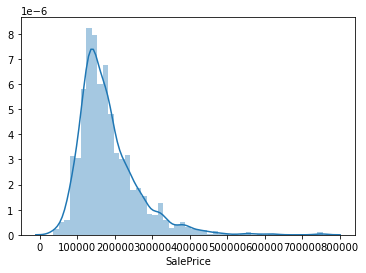

In [26]:
sns.distplot(df['SalePrice']) #한쪽으로 치우져져 있는것을 볼 수 있다.

In [27]:
#왜도와 첨도
print("왜도: %f" % df['SalePrice'].skew())
print("첨도: %f" % df['SalePrice'].kurt())

왜도: 1.882876
첨도: 6.536282


### 연속형 변수

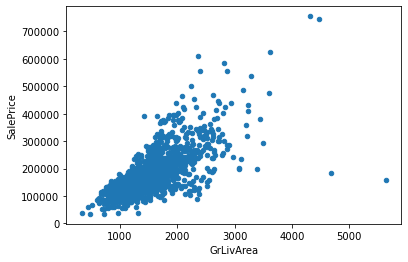

In [28]:
var = 'GrLivArea'
data=pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice') #선형적 관계가 있다.

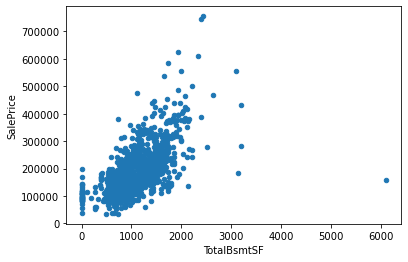

In [29]:
var = 'TotalBsmtSF'
data=pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice') #선형적 관계가 있다.

### 범주형 변수와 SalePrice간의 관계 시각화 -> boxplot

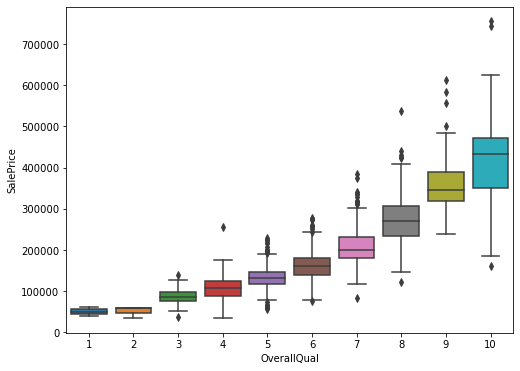

In [30]:
var='OverallQual'
data=pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var, y='SalePrice', data=data)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

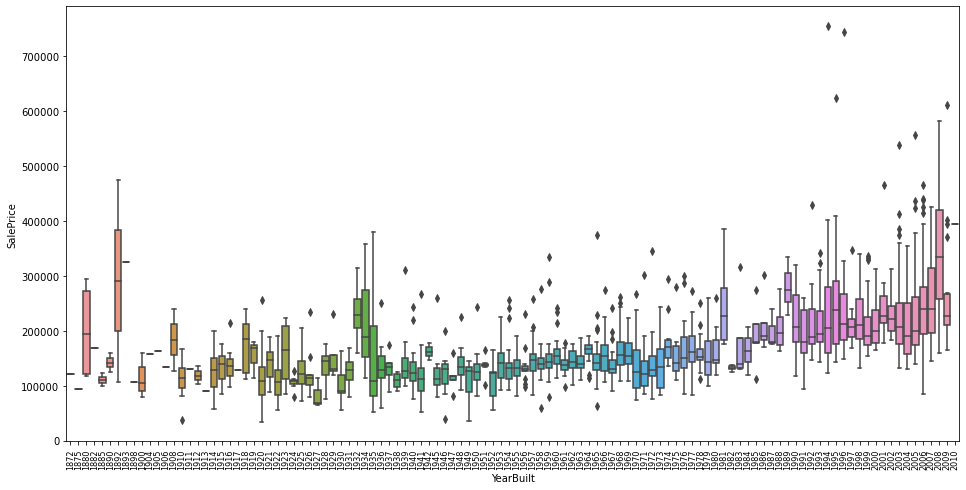

In [31]:
var='YearBuilt'
data=pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax=plt.subplots(figsize=(16,8))
fig=sns.boxplot(x=var, y='SalePrice', data=data)
plt.xticks(rotation=90, size=8)

In [32]:
#상관행렬
corrmat=df.corr()

In [33]:
k=10 #히트맵에 출력할 변수의 개수
corrmat.nlargest(k,'SalePrice')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


In [34]:
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index #SalePrice와 상관계수가 가장 높은 10개의 이름(k)

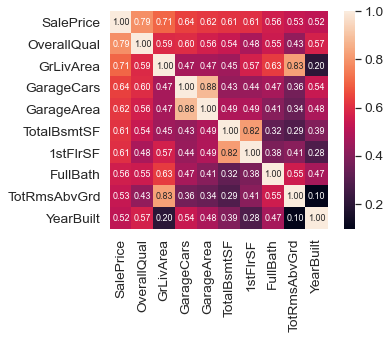

In [35]:
# 넘파이 피어슨 상관계수 : numpy.corrcoef()
np.corrcoef(df[cols])
cm=np.corrcoef(df[cols].T)
sns.set(font_scale=1.25)
sns.heatmap(cm, annot=True, square=True, annot_kws={'size':9}, 
            xticklabels=cols.values, yticklabels=cols.values, fmt='.2f')

In [36]:
sns.set() #default seaborn 옵션 설정

In [37]:
cols #높은순서대로 되어있음

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

/Users/jinwon-kim/Developer/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


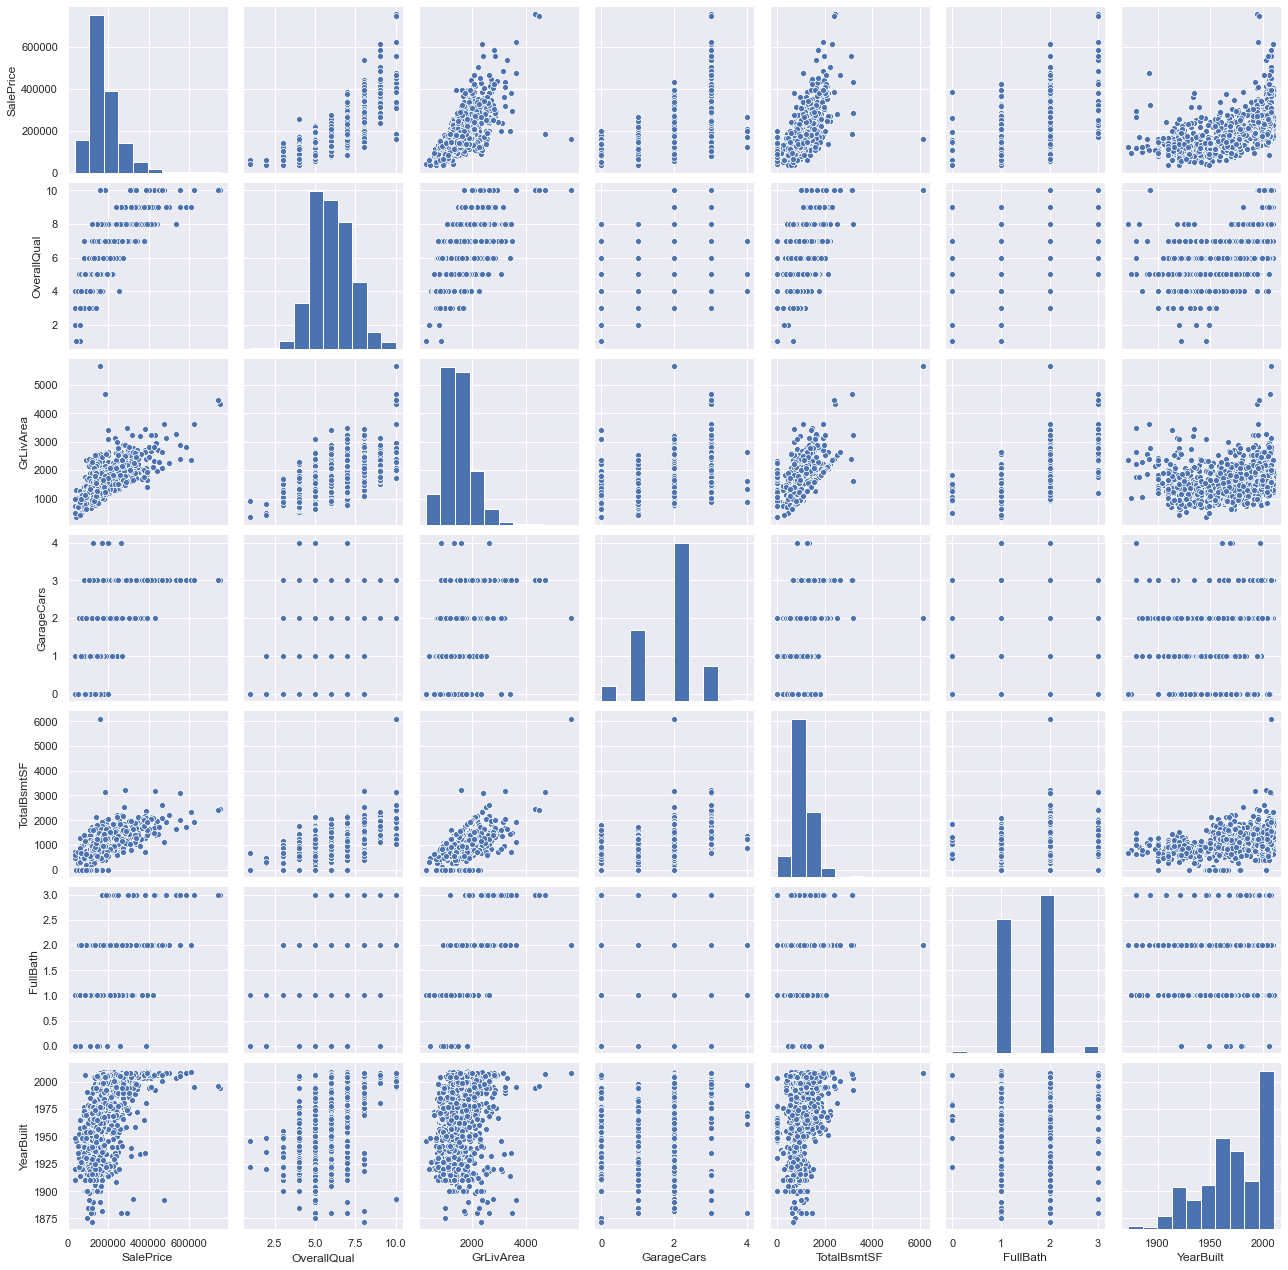

In [38]:
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df[cols], size=2.5)

#### 결측치 처리

In [39]:
total=df.isnull().sum().sort_values(ascending=False)

In [40]:
#데이터프레임 출력 (total, percent 열로, index는 total)
pd.concat([total, total/df.shape[0]], axis=1)

percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
...,...,...
CentralAir,0,0.000000
SaleCondition,0,0.000000
Heating,0,0.000000
TotalBsmtSF,0,0.000000


In [41]:
df=df.drop(missing_data[missing_data['Total']>1].index, 1) #열 제거

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [43]:
df.loc[df['Electrical'].isnull()]
df=df.drop(df.loc[df['Electrical'].isnull()].index) #결측치에 해당되는 행 제거

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   int64 
 2   MSZoning       1459 non-null   object
 3   LotArea        1459 non-null   int64 
 4   Street         1459 non-null   object
 5   LotShape       1459 non-null   object
 6   LandContour    1459 non-null   object
 7   Utilities      1459 non-null   object
 8   LotConfig      1459 non-null   object
 9   LandSlope      1459 non-null   object
 10  Neighborhood   1459 non-null   object
 11  Condition1     1459 non-null   object
 12  Condition2     1459 non-null   object
 13  BldgType       1459 non-null   object
 14  HouseStyle     1459 non-null   object
 15  OverallQual    1459 non-null   int64 
 16  OverallCond    1459 non-null   int64 
 17  YearBuilt      1459 non-null   int64 
 18  YearRemodAdd   1459 non-null

In [45]:
df.isnull().sum().max() #한번에 보기 편한 방법 

0

In [46]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
saleprice_scaled=StandardScaler().fit_transform(df['SalePrice'][:,np.newaxis])
saleprice_scaled
#fit_transform 함수는 2차원 데이터에 대해 변환 (표준화)
#np.newaxis: 새로운 축 추가(차원증가)

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

In [47]:
# df['SalePrice']

In [48]:
# df['SalePrice'][:,np.newaxis]

In [49]:
saleprice_scaled[:,0] #전체 행에대해서 0번째 요소 추출하면서 2차원에서 1차원으로 변경
saleprice_scaled[saleprice_scaled[:,0].argsort()] #표준화 되어진 결과에 대해서 오름차순 정렬
low_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][:10] #앞에서 10개
high_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:] #뒤에서 10개

# low_range, high_range에 이상치가 있는지 확인!!

In [50]:
low_range

array([[-1.83820775],
       [-1.83303414],
       [-1.80044422],
       [-1.78282123],
       [-1.77400974],
       [-1.62295562],
       [-1.6166617 ],
       [-1.58519209],
       [-1.58519209],
       [-1.57269236]])

In [51]:
high_range
# 표준화를 진행 했는데, 숫자 7은 크게 벗어난것으로 판단됨

array([[3.82758058],
       [4.0395221 ],
       [4.49473628],
       [4.70872962],
       [4.728631  ],
       [5.06034585],
       [5.42191907],
       [5.58987866],
       [7.10041987],
       [7.22629831]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


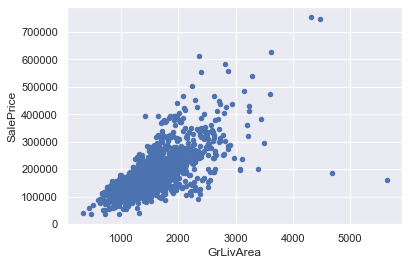

In [52]:
var = 'GrLivArea'
data=pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice') #선형적 관계가 있다.

In [53]:
df.sort_values(by='GrLivArea', ascending=False)[:2] #1299, 524 이상치 제거
df.drop(df[df['Id']==524].index, inplace=True)
df.drop(df[df['Id']==1299].index, inplace=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


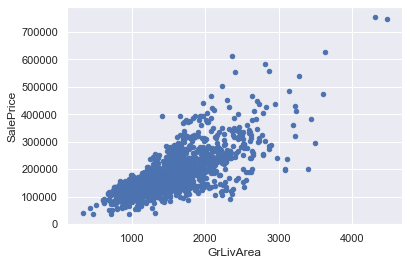

In [54]:
var = 'GrLivArea'
data=pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice') #선형적 관계가 있다.
#이상치가 제거된것을 볼수 있다.

### 정규분포를 따르는지 확인

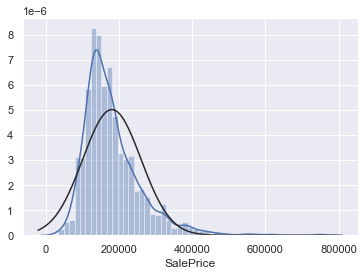

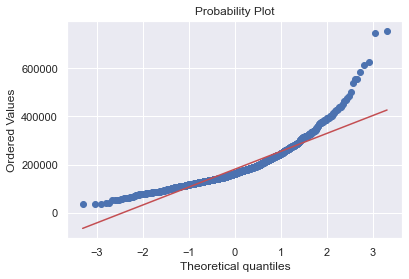

In [55]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df['SalePrice'], fit=norm)
fig=plt.figure()
res=stats.probplot(df['SalePrice'], plot=plt)
#검정 선이 : 정규분포함수
#파란색 선이 : 커널분포함수

# 정규성이 높을수록 아래 그래프가 직선에가까워진다
# 로그함수를 적용해서 정규성을 갖게 하자

In [56]:
df['SalePrice']=np.log(df['SalePrice'])

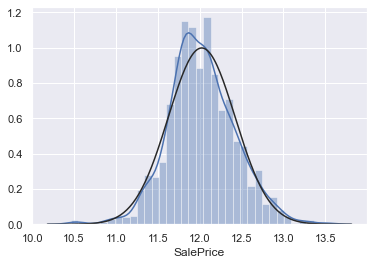

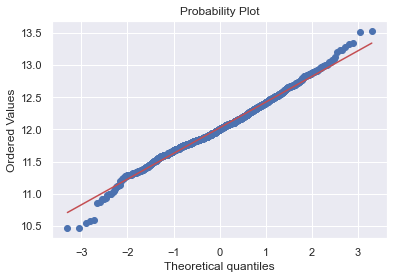

In [57]:
# 로그 변환을 통해서 종속변수가 정규성을 갖게 되었다!
sns.distplot(df['SalePrice'], fit=norm)
fig=plt.figure()
res=stats.probplot(df['SalePrice'], plot=plt)

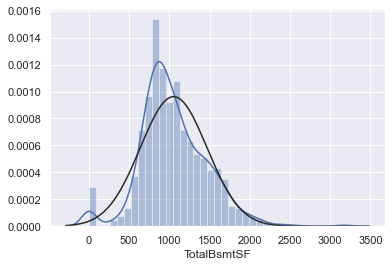

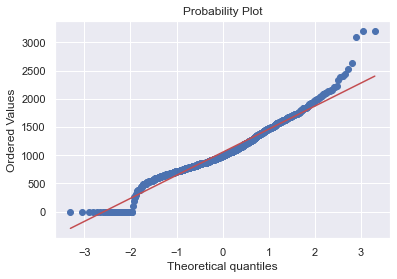

In [58]:
sns.distplot(df['TotalBsmtSF'], fit=norm)
fig=plt.figure()
res=stats.probplot(df['TotalBsmtSF'], plot=plt)

#### 요령: "divide by zero encountered in log" 로그에 무한이 뜰경우


In [59]:
df['HasBsmt']=pd.Series(len(df['TotalBsmtSF']), index=df.index)
df['HasBsmt']=0

In [60]:
df['HasBsmt']
df.loc[df['TotalBsmtSF']>0, 'HasBsmt']=1

In [61]:
df['HasBsmt'].value_counts()

1    1420
0      37
Name: HasBsmt, dtype: int64

In [63]:
# 0이 아닌것들을 계산
df.loc[df['HasBsmt']==1, 'TotalBsmtSF']=np.log(df['TotalBsmtSF'])

/Users/jinwon-kim/Developer/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


##### 0을 제외하고 출력

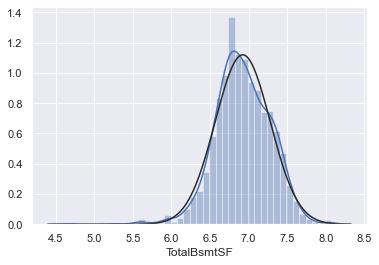

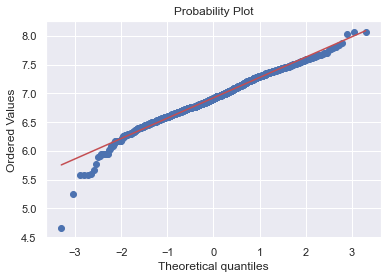

In [64]:
sns.distplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
fig=plt.figure()
res=stats.probplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [ ]:
df

In [70]:
# object 데이터를 수치로 변환, 주로 object데이터들이 get_dummies 대상이된다.
# 문자 -> 숫자 -> 가변수화

In [78]:
season=pd.DataFrame({'ss':['spr','sum','fal','wint', np.nan],
                     'ss2':['spr','sum','fal','wint', np.nan],
             'num':[1,2,3,4,5]})
season

,ss,ss2,num
0,spr,spr,1
1,sum,sum,2
2,fal,fal,3
3,wint,wint,4
4,NaN,NaN,5


In [79]:
season.info()
pd.get_dummies(season) #비수치 데이터 -> 가변수화

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ss      4 non-null      object
 1   ss2     4 non-null      object
 2   num     5 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


,num,ss_fal,ss_spr,ss_sum,ss_wint,ss2_fal,ss2_spr,ss2_sum,ss2_wint
0,1,0,1,0,0,0,1,0,0
1,2,0,0,1,0,0,0,1,0
2,3,1,0,0,0,1,0,0,0
3,4,0,0,0,1,0,0,0,1
4,5,0,0,0,0,0,0,0,0


In [80]:
pd.get_dummies(season, dummy_na=True) #nan을 추가

,num,ss_fal,ss_spr,ss_sum,ss_wint,ss_nan,ss2_fal,ss2_spr,ss2_sum,ss2_wint,ss2_nan
0,1,0,1,0,0,0,0,1,0,0,0
1,2,0,0,1,0,0,0,0,1,0,0
2,3,1,0,0,0,0,1,0,0,0,0
3,4,0,0,0,1,0,0,0,0,1,0
4,5,0,0,0,0,1,0,0,0,0,1


In [81]:
df=pd.get_dummies(df)
df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# 추석 기간에..
# 모델 (random forest regressor) -> 예측 -> 제출 -> 점수확인 -> 카페에 점수, 코드 업로드